In [1]:
import pathlib
import pickle
import pandas as pd
import seaborn as sns
import regression as reg
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Leitura dos Dados Pré-Processados

In [2]:
DATA_DIR = pathlib.Path.cwd().parent / 'projeto' / 'data'
print(DATA_DIR)

/home/jupyter/notebooks/projeto/data


In [3]:
PROCESSED_FILE_PATH = DATA_DIR / 'processed' / 'candidatos_centrais.pkl'

In [4]:
with open(PROCESSED_FILE_PATH, 'rb') as file:
    (
        df
    ) = pickle.load(file)

In [5]:
print(df.shape)
df.head(5)

(1500, 35)


,index,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,Q001,Q002,Q005,Q006,Q007,Q008,...,RESPOSTAS_QUESTIONARIO,ACERTOS_TOTAIS,RESPOSTAS_ESPECIFICAS,RESPOSTAS_GERAIS,ACERTOS_GERAIS,ACERTOS_ESPECIFICAS,c_quest,c_quest_restrict,c_prova,c_prova_restrict
0,2146868,210054238796,11,M,E,C,2.0,C,A,B,...,BECCABCAABAAAAABCB,60,AAACBCBDBAABEDBCECEBBACBDCABCBABDEBCADBBCCAEEA...,DCBECBBAAEBBCADEBDCABDCDBABCDDDAEBAEDDAEBEAAAB...,32,28,0.859167,0.801667,0.176458,0.822500
1,2822966,210052121926,3,F,B,B,8.0,D,A,D,...,EBBDADEAACCBBAACEC,51,ADDBEABACABBAEDBDCABEAEDCCCDDBEEAEDBDCEEEBBCAC...,DEEACCDDAEEBEAEADCCDCDBDBABCECDABCDEDCBACEAEAB...,30,21,0.165417,0.244162,0.248125,0.813333
2,2965833,210054081240,6,F,G,F,4.0,H,A,C,...,DGFHACDABBBBBBABED,93,DAABCACEBEBBEECAEBEBBAEBAAABDEBDBECDACABEEAECC...,EEDBCAADADDBEABDAEBDADABDABCDCACABDAEAAABCABAB...,44,49,0.807500,0.976667,0.205417,0.906667
3,2322664,210051351311,10,M,D,F,5.0,G,A,B,...,EDFGABDBCBABABAAEB,55,BCACEACEADCBADCBBDCAEBDABEDBDBACBECCBAABEABEAB...,DEEACCEBEAACBEDBEADADDCBDEACCEDBDDDAEBBADDBAEE...,20,35,0.203958,0.180150,0.223333,0.157631
4,2660396,210054361898,17,F,A,B,2.0,B,A,B,...,BABBABCAABAAAAABCA,55,DDEAAAECCDBCECDDDEEBBCEABDADAEEDBBECDDABEAAADD...,ECBADDABAABAEBDCDDAABAEDCECADBBABCEEDBCABCAAAB...,26,29,0.213750,0.236239,0.174792,0.231651


# 1) Verificando Perfil dos Candidatos Centrais

## Investigando Centralidades

Vamos dar uma olhada na divisão das centralidades calculadas para cada rede:

<AxesSubplot: >

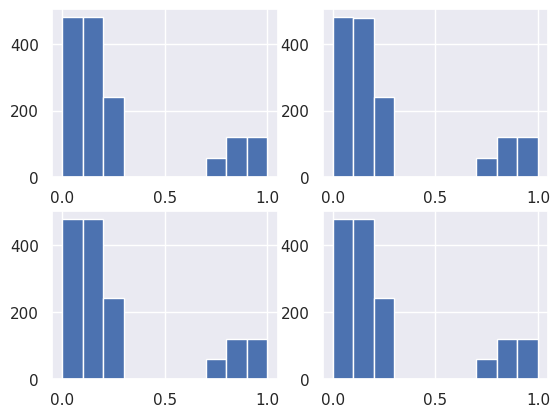

In [6]:
plt.figure()
plt.subplot(2, 2, 1)
df['c_quest'].hist()
plt.subplot(2, 2, 2)
df['c_quest_restrict'].hist()
plt.subplot(2, 2, 3)
df['c_prova'].hist()
plt.subplot(2, 2, 4)
df['c_prova_restrict'].hist()

Parece haver uma distinção clara entre centro e periferia a partir de $c = 0.5$. Vou utilizar esse valor como thresh para criar novos dataframes.

In [7]:
centrais_prova_mean = df.loc[df['c_prova'] > 0.5]
perif_prova_mean = df.loc[df['c_prova'] < 0.5]
centrais_prova_restrict = df.loc[df['c_prova_restrict'] > 0.5]
perif_prova_restrict = df.loc[df['c_prova_restrict'] < 0.5]
centrais_quest_mean = df.loc[df['c_quest'] > 0.5]
perif_quest_mean = df.loc[df['c_quest'] < 0.5]
centrais_quest_restrict = df.loc[df['c_quest_restrict'] > 0.5]
perif_quest_restrict = df.loc[df['c_quest_restrict'] < 0.5]

## 1.1) Analisando Desempenho

### Para os centrais na Rede da Prova

In [8]:
colunas_de_interesse = ['TP_FAIXA_ETARIA','TP_SEXO', 'ACERTOS_GERAIS', 'ACERTOS_ESPECIFICAS', 
                        'ACERTOS_TOTAIS', 'c_quest', 'c_prova', 'c_quest_restrict', 'c_prova_restrict']

In [9]:
summary_prova = centrais_prova_mean[colunas_de_interesse].describe()
summary_prova

,TP_FAIXA_ETARIA,ACERTOS_GERAIS,ACERTOS_ESPECIFICAS,ACERTOS_TOTAIS,c_quest,c_prova,c_quest_restrict,c_prova_restrict
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,4.391304,27.943144,31.237458,59.180602,0.320401,0.875000,0.355362,0.362229
std,3.539431,10.662302,12.373947,21.934638,0.309640,0.072048,0.336046,0.343653
min,1.000000,7.000000,5.000000,18.000000,0.002500,0.750833,0.003962,0.005004
25%,2.000000,20.000000,23.000000,44.000000,0.124896,0.812917,0.118745,0.117077
50%,3.000000,26.000000,28.000000,54.000000,0.197917,0.875000,0.193286,0.194954
75%,5.000000,34.000000,35.500000,69.500000,0.245938,0.937083,0.788750,0.786250
max,17.000000,59.000000,82.000000,138.000000,0.995833,0.999167,0.997500,0.996667


In [10]:
summary_prova_restrict = centrais_prova_restrict[colunas_de_interesse].describe()
summary_prova_restrict

,TP_FAIXA_ETARIA,ACERTOS_GERAIS,ACERTOS_ESPECIFICAS,ACERTOS_TOTAIS,c_quest,c_prova,c_quest_restrict,c_prova_restrict
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,4.678930,28.344482,30.705686,59.050167,0.404222,0.372707,0.849816,0.875000
std,3.711571,10.427364,11.810884,21.114759,0.332390,0.324731,0.150872,0.072048
min,1.000000,7.000000,12.000000,25.000000,0.038333,0.012708,0.180359,0.750833
25%,2.000000,20.000000,22.500000,43.000000,0.166146,0.155313,0.808750,0.812917
50%,3.000000,27.000000,27.000000,55.000000,0.217292,0.206667,0.874167,0.875000
75%,6.000000,34.000000,35.000000,70.000000,0.797917,0.785417,0.937083,0.937083
max,17.000000,63.000000,83.000000,143.000000,0.998333,0.999167,0.999167,0.999167


### Para os centrais na Rede de Questionário

In [11]:
summary_quest = centrais_quest_mean[colunas_de_interesse].describe()
summary_quest

,TP_FAIXA_ETARIA,ACERTOS_GERAIS,ACERTOS_ESPECIFICAS,ACERTOS_TOTAIS,c_quest,c_prova,c_quest_restrict,c_prova_restrict
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,4.434783,28.87291,31.602007,60.474916,0.875000,0.329681,0.397557,0.393607
std,3.483171,10.92119,12.909811,22.800018,0.072048,0.301931,0.342647,0.339397
min,1.000000,9.00000,5.000000,18.000000,0.750833,0.011250,0.003962,0.008340
25%,2.000000,21.00000,23.000000,44.000000,0.812917,0.153854,0.155442,0.154817
50%,3.000000,27.00000,28.000000,55.000000,0.875000,0.200208,0.217264,0.217056
75%,5.000000,35.00000,37.000000,72.000000,0.937083,0.242917,0.807917,0.815833
max,16.000000,63.00000,86.000000,146.000000,0.999167,0.999167,0.999167,0.997500


In [12]:
summary_quest_restrict = centrais_quest_restrict[colunas_de_interesse].describe()
summary_quest_restrict

,TP_FAIXA_ETARIA,ACERTOS_GERAIS,ACERTOS_ESPECIFICAS,ACERTOS_TOTAIS,c_quest,c_prova,c_quest_restrict,c_prova_restrict
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,4.638796,28.498328,31.143813,59.642140,0.407591,0.370684,0.875000,0.848542
std,3.603219,10.709519,12.197317,21.825475,0.333671,0.323805,0.072048,0.150495
min,1.000000,7.000000,12.000000,25.000000,0.038333,0.012708,0.750833,0.172018
25%,2.000000,20.000000,23.000000,43.000000,0.167604,0.155313,0.812917,0.807083
50%,3.000000,27.000000,28.000000,55.000000,0.217292,0.206667,0.875000,0.872500
75%,6.000000,34.500000,36.000000,70.500000,0.802500,0.783333,0.937083,0.936250
max,17.000000,63.000000,83.000000,143.000000,0.998333,0.999167,0.999167,0.999167


No início do projeto acreditávamos que os candidatos centrais na rede de provas seriam aqueles que mais acertam, mas aparentemente esse não é o caso (a média entre os dois centros está parecida).

Mas opa! Parece que para um threshold de acertos mais alto a centralidade de questionário e de prova estão correlacionados positivamente! Vamos continuar esse notebook usando apenas os dataFrames restricted.

## 1.2) Analisando Respostas do Questionário Socioeconômico

Para auxiliar na análise, trouxe os enunciados das questões para serem plotadas junto com os gráficos.

In [13]:
questoes_socio = [('Q001', 'Até que série seu pai, ou o homem responsável por você, estudou?'), 
                  ('Q002', 'Até que série sua mãe, ou a mulher responsável por você, estudou?'), 
                  ('Q006', 'Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares).'), 
                  ('Q007', 'Em sua residência trabalha empregado(a) doméstico(a)?'), 
                  ('Q008', 'Na sua residência tem banheiro?'), 
                  ('Q009', 'Na sua residência tem quartos para dormir?'), 
                  ('Q010', 'Na sua residência tem carro?'), 
                  ('Q011', 'Na sua residência tem motocicleta?'), 
                  ('Q012', 'Na sua residência tem geladeira?'), 
                  ('Q013', 'Na sua residência tem freezer (independente ou segunda porta da geladeira)?'),
                  ('Q014', 'Na sua residência tem máquina de lavar roupa? (o tanquinho NÃO deve ser considerado)'), 
                  ('Q015', 'Na sua residência tem máquina de secar roupa (independente ou em conjunto com a máquina de lavar roupa)?'), 
                  ('Q016', 'Na sua residência tem forno micro-ondas?'), 
                  ('Q017', 'Na sua residência tem máquina de lavar louça?'), 
                  ('Q019', 'Na sua residência tem televisão em cores?'), 
                  ('Q022', 'Na sua residência tem telefone celular?'), 
                  ('Q024', 'Na sua residência tem computador?'), 
                  ('Q005_str', 'Incluindo você, quantas pessoas moram atualmente em sua residência?')]

Q001 ATÉ QUE SÉRIE SEU PAI, OU O HOMEM RESPONSÁVEL POR VOCÊ, ESTUDOU?
CANDIDATOS CENTRAIS
A    0.020067
B    0.130435
C    0.147157
D    0.100334
E    0.344482
F    0.076923
G    0.113712
H     0.06689
Name: Q001, dtype: Float64
CANDIDATOS PERIFÉRICOS
A       0.035
B    0.143333
C    0.123333
D      0.1075
E      0.3175
F    0.120833
G       0.075
H      0.0775
Name: Q001, dtype: Float64
Esquerda: Centro / Direita: Periferia


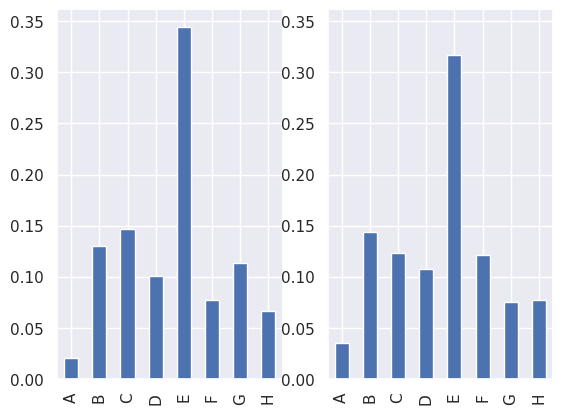

Q002 ATÉ QUE SÉRIE SUA MÃE, OU A MULHER RESPONSÁVEL POR VOCÊ, ESTUDOU?
CANDIDATOS CENTRAIS
A    0.010033
B    0.093645
C    0.090301
D    0.120401
E    0.367893
F    0.140468
G    0.143813
H    0.033445
Name: Q002, dtype: Float64
CANDIDATOS PERIFÉRICOS
A        0.02
B    0.096667
C    0.099167
D    0.109167
E    0.350833
F      0.1575
G    0.145833
H    0.020833
Name: Q002, dtype: Float64
Esquerda: Centro / Direita: Periferia


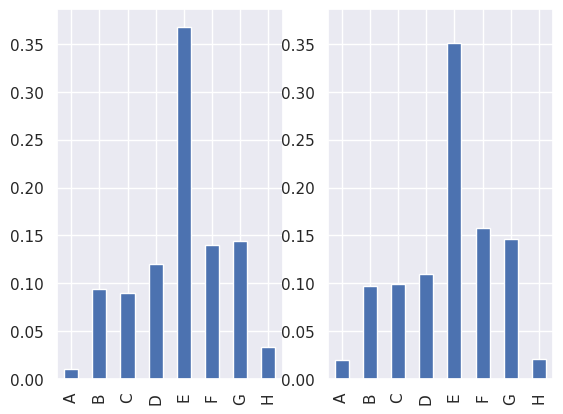

Q006 QUAL É A RENDA MENSAL DE SUA FAMÍLIA? (SOME A SUA RENDA COM A DOS SEUS FAMILIARES).
CANDIDATOS CENTRAIS
A    0.036789
B    0.214047
C    0.137124
D    0.137124
E    0.060201
F    0.093645
G    0.103679
H     0.06689
I    0.023411
J    0.020067
K    0.016722
L    0.016722
M    0.016722
N    0.010033
O    0.006689
P    0.010033
Q      0.0301
Name: Q006, dtype: Float64
CANDIDATOS PERIFÉRICOS
A      0.0475
B    0.264167
C    0.155833
D    0.109167
E    0.065833
F       0.075
G    0.063333
H    0.055833
I    0.028333
J    0.021667
K      0.0175
L       0.015
M    0.023333
N    0.008333
O      0.0175
P    0.013333
Q    0.018333
Name: Q006, dtype: Float64
Esquerda: Centro / Direita: Periferia


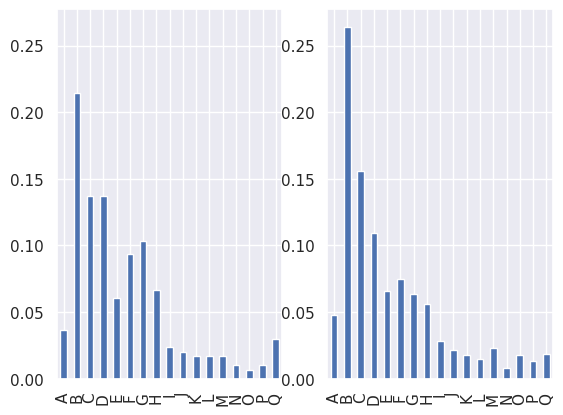

Q007 EM SUA RESIDÊNCIA TRABALHA EMPREGADO(A) DOMÉSTICO(A)?
CANDIDATOS CENTRAIS
A    0.899666
B    0.060201
C    0.013378
D    0.026756
Name: Q007, dtype: Float64
CANDIDATOS PERIFÉRICOS
A    0.913333
B       0.045
C      0.0125
D    0.029167
Name: Q007, dtype: Float64
Esquerda: Centro / Direita: Periferia


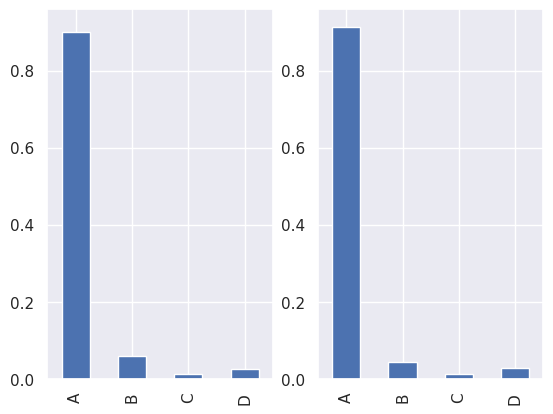

Q008 NA SUA RESIDÊNCIA TEM BANHEIRO?
CANDIDATOS CENTRAIS
B    0.625418
C    0.220736
D    0.107023
E    0.046823
Name: Q008, dtype: Float64
CANDIDATOS PERIFÉRICOS
A    0.009167
B      0.5925
C    0.264167
D    0.088333
E    0.045833
Name: Q008, dtype: Float64
Esquerda: Centro / Direita: Periferia


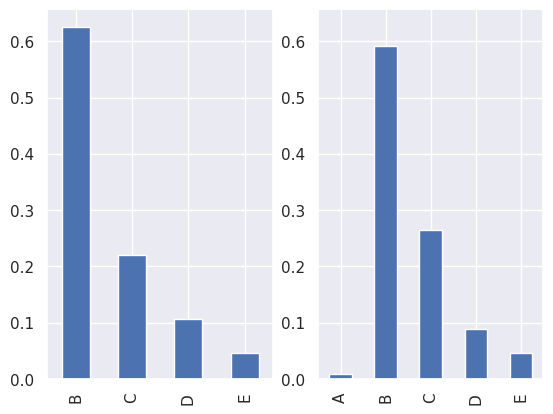

Q009 NA SUA RESIDÊNCIA TEM QUARTOS PARA DORMIR?
CANDIDATOS CENTRAIS
B    0.083612
C    0.424749
D    0.431438
E    0.060201
Name: Q009, dtype: Float64
CANDIDATOS PERIFÉRICOS
A    0.003333
B    0.091667
C    0.470833
D    0.373333
E    0.060833
Name: Q009, dtype: Float64
Esquerda: Centro / Direita: Periferia


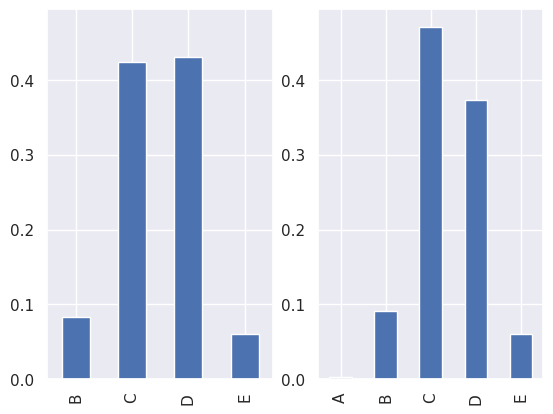

Q010 NA SUA RESIDÊNCIA TEM CARRO?
CANDIDATOS CENTRAIS
A    0.478261
B    0.391304
C    0.117057
D    0.010033
E    0.003344
Name: Q010, dtype: Float64
CANDIDATOS PERIFÉRICOS
A    0.466667
B      0.4025
C       0.115
D       0.015
E    0.000833
Name: Q010, dtype: Float64
Esquerda: Centro / Direita: Periferia


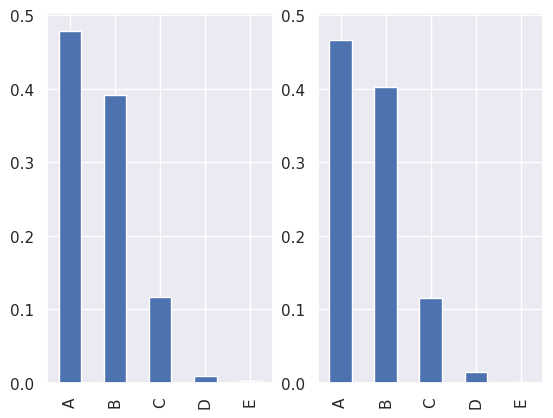

Q011 NA SUA RESIDÊNCIA TEM MOTOCICLETA?
CANDIDATOS CENTRAIS
A    0.749164
B    0.214047
C    0.033445
D    0.003344
Name: Q011, dtype: Float64
CANDIDATOS PERIFÉRICOS
A      0.7475
B    0.228333
C      0.0225
D    0.001667
Name: Q011, dtype: Float64
Esquerda: Centro / Direita: Periferia


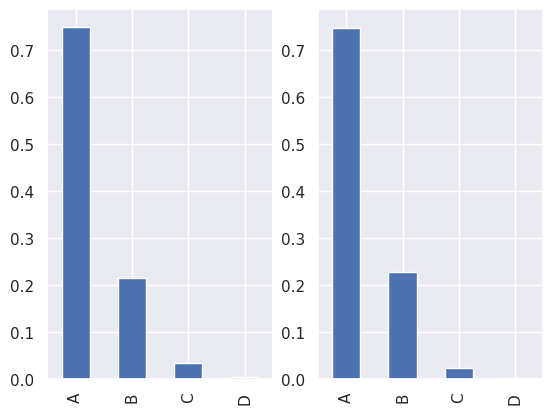

Q012 NA SUA RESIDÊNCIA TEM GELADEIRA?
CANDIDATOS CENTRAIS
A    0.023411
B    0.936455
C    0.036789
D    0.003344
Name: Q012, dtype: Float64
CANDIDATOS PERIFÉRICOS
A    0.011667
B        0.92
C       0.065
D    0.000833
E      0.0025
Name: Q012, dtype: Float64
Esquerda: Centro / Direita: Periferia


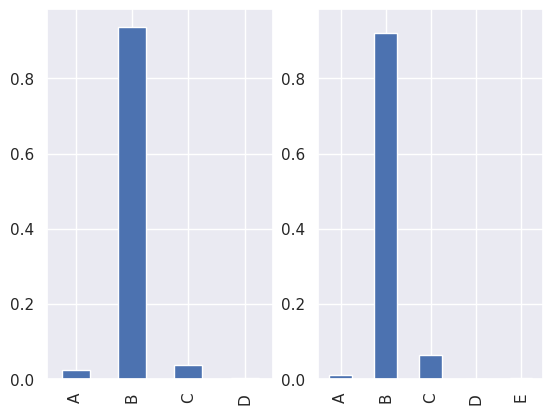

Q013 NA SUA RESIDÊNCIA TEM FREEZER (INDEPENDENTE OU SEGUNDA PORTA DA GELADEIRA)?
CANDIDATOS CENTRAIS
A    0.494983
B    0.474916
C      0.0301
Name: Q013, dtype: Float64
CANDIDATOS PERIFÉRICOS
A    0.508333
B        0.45
C    0.035833
D       0.005
E    0.000833
Name: Q013, dtype: Float64
Esquerda: Centro / Direita: Periferia


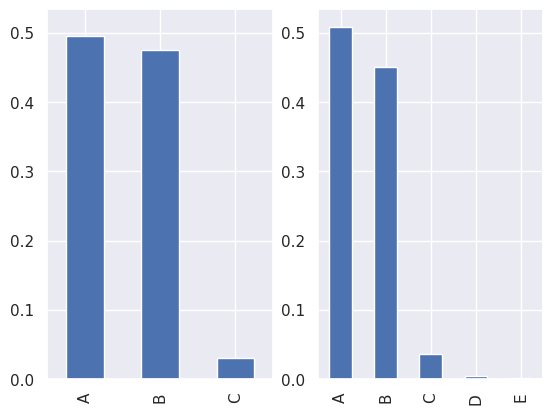

Q014 NA SUA RESIDÊNCIA TEM MÁQUINA DE LAVAR ROUPA? (O TANQUINHO NÃO DEVE SER CONSIDERADO)
CANDIDATOS CENTRAIS
A    0.364548
B    0.625418
C    0.010033
Name: Q014, dtype: Float64
CANDIDATOS PERIFÉRICOS
A    0.340833
B    0.648333
C        0.01
D    0.000833
Name: Q014, dtype: Float64
Esquerda: Centro / Direita: Periferia


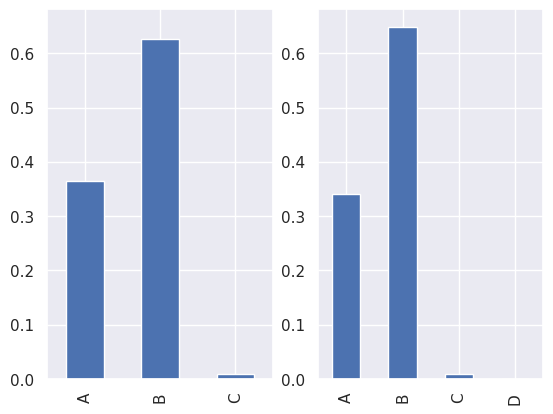

Q015 NA SUA RESIDÊNCIA TEM MÁQUINA DE SECAR ROUPA (INDEPENDENTE OU EM CONJUNTO COM A MÁQUINA DE LAVAR ROUPA)?
CANDIDATOS CENTRAIS
A    0.886288
B    0.113712
Name: Q015, dtype: Float64
CANDIDATOS PERIFÉRICOS
A      0.8675
B    0.130833
C    0.001667
Name: Q015, dtype: Float64
Esquerda: Centro / Direita: Periferia


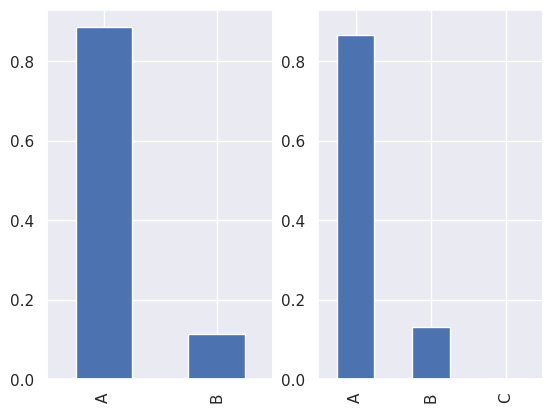

Q016 NA SUA RESIDÊNCIA TEM FORNO MICRO-ONDAS?
CANDIDATOS CENTRAIS
A    0.458194
B    0.541806
Name: Q016, dtype: Float64
CANDIDATOS PERIFÉRICOS
A      0.4775
B    0.515833
C    0.005833
D    0.000833
Name: Q016, dtype: Float64
Esquerda: Centro / Direita: Periferia


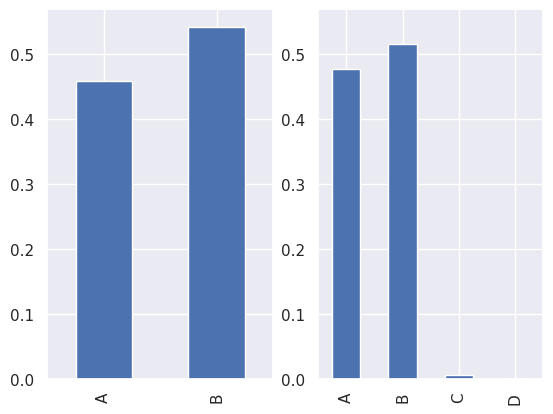

Q017 NA SUA RESIDÊNCIA TEM MÁQUINA DE LAVAR LOUÇA?
CANDIDATOS CENTRAIS
A    0.966555
B    0.033445
Name: Q017, dtype: Float64
CANDIDATOS PERIFÉRICOS
A    0.958333
B    0.041667
Name: Q017, dtype: Float64
Esquerda: Centro / Direita: Periferia


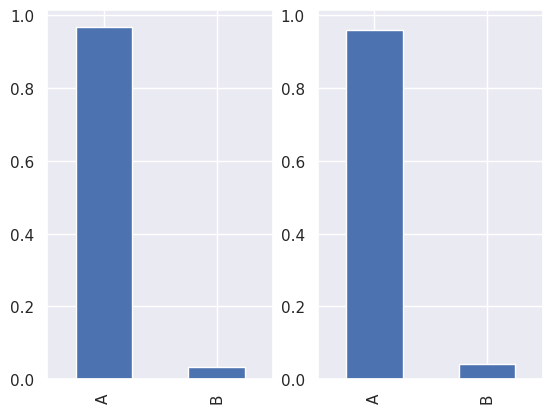

Q019 NA SUA RESIDÊNCIA TEM TELEVISÃO EM CORES?
CANDIDATOS CENTRAIS
A    0.040134
B    0.635452
C    0.200669
D    0.090301
E    0.033445
Name: Q019, dtype: Float64
CANDIDATOS PERIFÉRICOS
A       0.035
B    0.623333
C    0.225833
D    0.075833
E        0.04
Name: Q019, dtype: Float64
Esquerda: Centro / Direita: Periferia


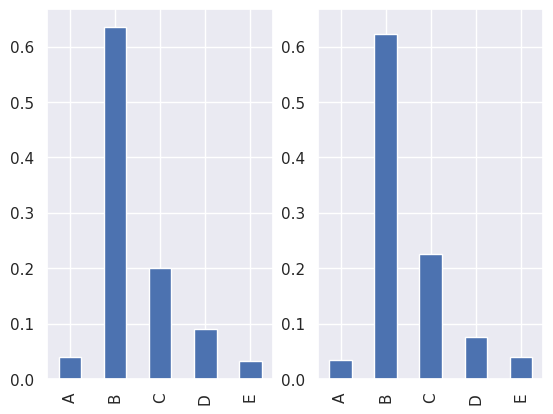

Q022 NA SUA RESIDÊNCIA TEM TELEFONE CELULAR?
CANDIDATOS CENTRAIS
A    0.006689
B    0.120401
C    0.230769
D    0.384615
E    0.257525
Name: Q022, dtype: Float64
CANDIDATOS PERIFÉRICOS
A    0.019167
B      0.1325
C    0.273333
D    0.320833
E    0.254167
Name: Q022, dtype: Float64
Esquerda: Centro / Direita: Periferia


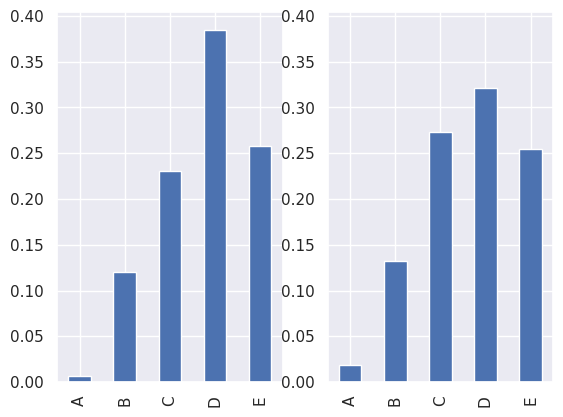

Q024 NA SUA RESIDÊNCIA TEM COMPUTADOR?
CANDIDATOS CENTRAIS
A    0.347826
B    0.461538
C    0.130435
D    0.040134
E    0.020067
Name: Q024, dtype: Float64
CANDIDATOS PERIFÉRICOS
A        0.37
B    0.426667
C      0.1275
D       0.055
E    0.020833
Name: Q024, dtype: Float64
Esquerda: Centro / Direita: Periferia


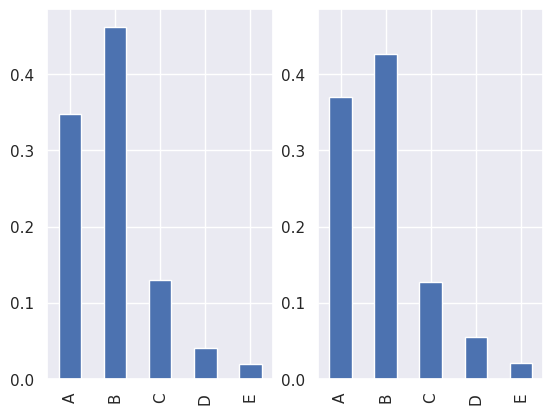

Q005_str INCLUINDO VOCÊ, QUANTAS PESSOAS MORAM ATUALMENTE EM SUA RESIDÊNCIA?
CANDIDATOS CENTRAIS
A      0.0301
B    0.110368
C    0.220736
D    0.377926
E    0.207358
F    0.053512
Name: Q005_str, dtype: Float64
CANDIDATOS PERIFÉRICOS
A    0.018333
B    0.133333
C    0.254167
D    0.370833
E    0.183333
F        0.04
Name: Q005_str, dtype: Float64
Esquerda: Centro / Direita: Periferia


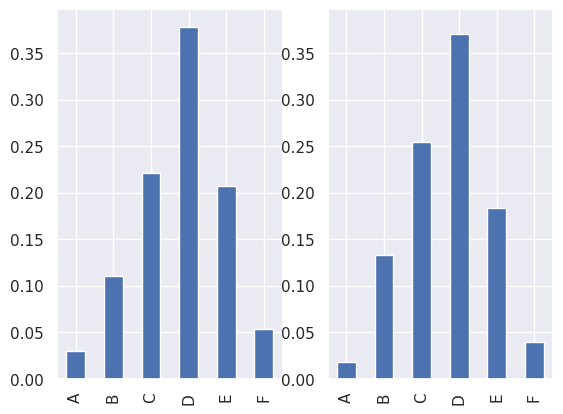

In [14]:
 for i, (quest, enunciado) in enumerate(questoes_socio):
    plt.figure()
    value_counts_centro = centrais_quest_restrict[quest].value_counts().sort_index()
    norm_vc_c = value_counts_centro/value_counts_centro.sum()
    value_counts_periferia = perif_quest_restrict[quest].value_counts().sort_index()
    norm_vc_p = value_counts_periferia/value_counts_periferia.sum()
    print(quest, enunciado.upper())
    print('CANDIDATOS CENTRAIS')
    print(norm_vc_c)
    print('CANDIDATOS PERIFÉRICOS')
    print(norm_vc_p)
    print('Esquerda: Centro / Direita: Periferia')
    plt.subplot(1, 2, 1)
    #value_counts_q.plot(kind='bar')
    max_y_value = max([max(norm_vc_c), max(norm_vc_p)])*1.05
    norm_vc_c.plot(kind='bar', ylim = (0, max_y_value))
    plt.subplot(1, 2, 2)
    #value_counts_p.plot(kind='bar')
    norm_vc_p.plot(kind='bar', ylim = (0, max_y_value))
    plt.show()

Tirando renda, aparentemente todos os candidatos possuem características bem semelhantes... vamos investigar isso melhor.

### Calculando a Média Salarial

Um dos gráficos de maior distinção entre os dois grupos é o de diferença salarial. Vamos analisá-lo de forma mais numérica.

In [15]:
# Renda Máxima para cada alternativa (A = 0, B = max de R$1100, C = max de R$1650)
lista_renda = [0, 1100, 1650, 2200, 2750, 3300, 4400, 5500, 6600, 7700, 8800, 9900, 11000, 13200, 16500, 22000]

In [16]:
# Centro
renda_counts = centrais_prova_restrict['Q006'].value_counts().sort_index()
renda_counts = renda_counts/renda_counts.sum()
renda_media = 0
for i in range(len(lista_renda)):
    renda_media += renda_counts[i] * lista_renda[i]
renda_media

3358.8628762541807

In [17]:
# Periferia
renda_counts = perif_prova_restrict['Q006'].value_counts().sort_index()
renda_counts = renda_counts/renda_counts.sum()
lista_renda = [0, 1100, 1650, 2200, 2750, 3300, 4400, 5500, 6600, 7700, 8800, 9900, 11000, 13200, 16500, 22000]
renda_media = 0
for i in range(len(lista_renda)):
    renda_media += renda_counts[i] * lista_renda[i]
renda_media

3400.375

# 2) Aplicando Regressões

Vamos ver se a correlação que notamos entre os centros de fato existe.

## 2.1) Tratando os Dados

### Aplicando Staircase Encoding em `TP_FAIXA_ETARIA`

In [18]:
values = list(df['TP_FAIXA_ETARIA'].unique())
values.sort()
values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [19]:
length = len(values) - 1

dummies = [[] for i in range(length)]

In [20]:
for value in df['TP_FAIXA_ETARIA']:
    index = values.index(value)

    for i in range(index):
        dummies[i].append(1)

    for i in range(index, length):
        dummies[i].append(0)

In [21]:
for value, dummy in zip(values[1:], dummies):
    df[f'TP_FAIXA_ETARIA{value}'] = dummy

### Aplicando dummies em `TP_SEXO`

In [22]:
df = pd.get_dummies(df, columns=['TP_SEXO'])

In [23]:
df.columns

Index(['index', 'NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'Q001', 'Q002', 'Q005',
       'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q019', 'Q022', 'Q024', 'RESPOSTAS_PROVA',
       'GABARITO_OFICIAL', 'Q005_str', 'RESPOSTAS_QUESTIONARIO',
       'ACERTOS_TOTAIS', 'RESPOSTAS_ESPECIFICAS', 'RESPOSTAS_GERAIS',
       'ACERTOS_GERAIS', 'ACERTOS_ESPECIFICAS', 'c_quest', 'c_quest_restrict',
       'c_prova', 'c_prova_restrict', 'TP_FAIXA_ETARIA2', 'TP_FAIXA_ETARIA3',
       'TP_FAIXA_ETARIA4', 'TP_FAIXA_ETARIA5', 'TP_FAIXA_ETARIA6',
       'TP_FAIXA_ETARIA7', 'TP_FAIXA_ETARIA8', 'TP_FAIXA_ETARIA9',
       'TP_FAIXA_ETARIA10', 'TP_FAIXA_ETARIA11', 'TP_FAIXA_ETARIA12',
       'TP_FAIXA_ETARIA13', 'TP_FAIXA_ETARIA14', 'TP_FAIXA_ETARIA15',
       'TP_FAIXA_ETARIA16', 'TP_FAIXA_ETARIA17', 'TP_SEXO_F', 'TP_SEXO_M'],
      dtype='object')

Vamos remontar os dataframe de centro e de periferia com os encodings.

In [24]:
centrais_prova_restrict = df.loc[df['c_prova_restrict'] > 0.5]
perif_prova_restrict = df.loc[df['c_prova_restrict'] < 0.5]
centrais_quest_restrict = df.loc[df['c_quest_restrict'] > 0.5]
perif_quest_restrict = df.loc[df['c_quest_restrict'] < 0.5]

## 2.2) Testando Modelos

### Verificando efeitos separadamente

#### Centralidade do Questionário

In [27]:
result = reg.linear(data=df, formula='c_prova_restrict ~ c_quest_restrict')
result.micro_summary()

variable,coefficient,std error,p-value
c_quest_restrict,0.957888,0.007421,0.000000


#### Sexo

In [28]:
result = reg.linear(data=df, formula='c_prova_restrict ~ TP_SEXO_F')
result.micro_summary()

variable,coefficient,std error,p-value
TP_SEXO_F,-0.031522,0.016556,0.057113


#### Faixa Etária

In [29]:
result = reg.linear(data=df, formula='c_prova_restrict ~ TP_FAIXA_ETARIA2 + TP_FAIXA_ETARIA3 + TP_FAIXA_ETARIA4 + TP_FAIXA_ETARIA5 + TP_FAIXA_ETARIA6 + TP_FAIXA_ETARIA7 + TP_FAIXA_ETARIA8 + TP_FAIXA_ETARIA9 + TP_FAIXA_ETARIA10 + TP_FAIXA_ETARIA11 + TP_FAIXA_ETARIA12 + TP_FAIXA_ETARIA13 + TP_FAIXA_ETARIA14 + TP_FAIXA_ETARIA15 + TP_FAIXA_ETARIA16 + TP_FAIXA_ETARIA17')
result.micro_summary()

variable,coefficient,std error,p-value
TP_FAIXA_ETARIA2,0.046747,0.029327,0.111148
TP_FAIXA_ETARIA3,-0.004255,0.023183,0.854383
TP_FAIXA_ETARIA4,-0.027332,0.028783,0.342482
TP_FAIXA_ETARIA5,-0.033605,0.038276,0.380104
TP_FAIXA_ETARIA6,0.091683,0.048209,0.057394
TP_FAIXA_ETARIA7,-0.034860,0.063594,0.583665
TP_FAIXA_ETARIA8,0.037184,0.074357,0.617098
TP_FAIXA_ETARIA9,0.083933,0.084921,0.323138
TP_FAIXA_ETARIA10,-0.114037,0.091068,0.210688
TP_FAIXA_ETARIA11,-0.000831,0.074009,0.991042


## 2.3) Análise Conjunta

### Para DataFrame Completo

In [42]:
def linear_results(dataframe):
    result = reg.linear(data = dataframe, formula = 'c_prova_restrict ~ c_quest_restrict + TP_SEXO_M + TP_FAIXA_ETARIA2 + TP_FAIXA_ETARIA3 + TP_FAIXA_ETARIA4 + TP_FAIXA_ETARIA5 + TP_FAIXA_ETARIA6 + TP_FAIXA_ETARIA7 + TP_FAIXA_ETARIA8 + TP_FAIXA_ETARIA9 + TP_FAIXA_ETARIA10 + TP_FAIXA_ETARIA11 + TP_FAIXA_ETARIA12 + TP_FAIXA_ETARIA13 + TP_FAIXA_ETARIA14 + TP_FAIXA_ETARIA15 + TP_FAIXA_ETARIA16 + TP_FAIXA_ETARIA17')
    result.plot_residuals()
    plt.show()
    return result.micro_summary()

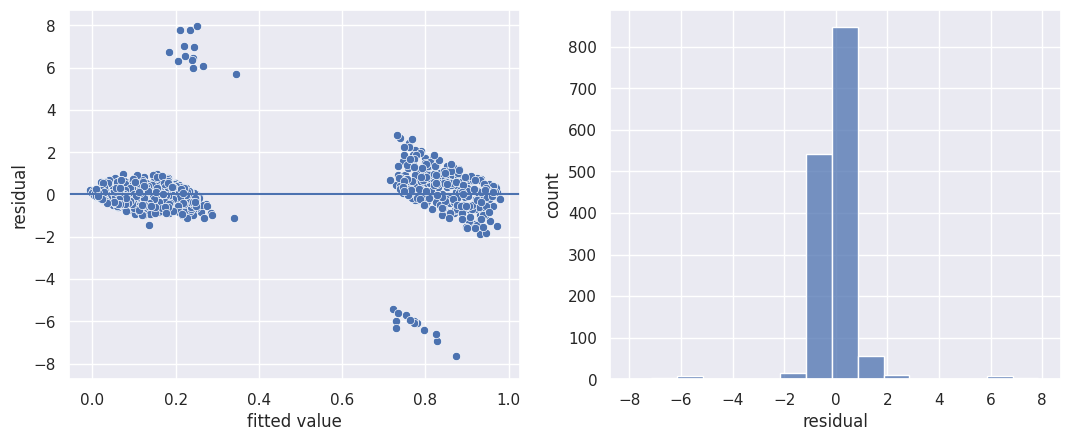

variable,coefficient,std error,p-value
c_quest_restrict,0.957279,0.007445,0.000000
TP_SEXO_M,0.007459,0.004787,0.119354
TP_FAIXA_ETARIA2,-0.004438,0.008415,0.598036
TP_FAIXA_ETARIA3,-0.002573,0.006643,0.698554
TP_FAIXA_ETARIA4,-0.004800,0.008249,0.560743
TP_FAIXA_ETARIA5,-0.008742,0.010968,0.425576
TP_FAIXA_ETARIA6,0.009230,0.013828,0.504580
TP_FAIXA_ETARIA7,0.009582,0.018243,0.599481
TP_FAIXA_ETARIA8,-0.008316,0.021316,0.696513
TP_FAIXA_ETARIA9,-0.000797,0.024342,0.973892


In [43]:
linear_results(df)

### Considerando Apenas Candidatos Centrais

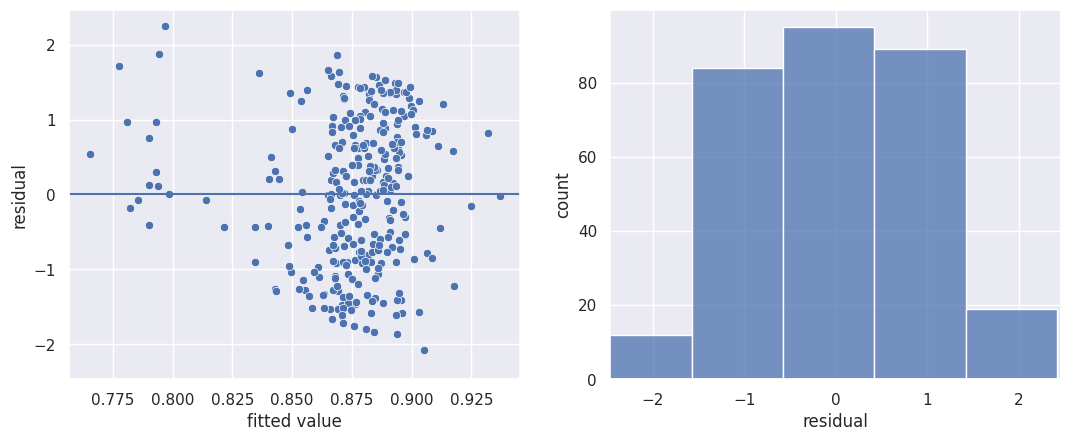

variable,coefficient,std error,p-value
c_quest_restrict,0.138526,0.027785,0.000001
TP_SEXO_M,0.002497,0.008420,0.767062
TP_FAIXA_ETARIA2,0.011187,0.015960,0.483914
TP_FAIXA_ETARIA3,-0.001561,0.011493,0.892058
TP_FAIXA_ETARIA4,-0.000031,0.015479,0.998414
TP_FAIXA_ETARIA5,-0.008729,0.023308,0.708315
TP_FAIXA_ETARIA6,0.003709,0.026067,0.886946
TP_FAIXA_ETARIA7,0.018496,0.031530,0.557926
TP_FAIXA_ETARIA8,-0.043947,0.035062,0.211105
TP_FAIXA_ETARIA9,0.047409,0.033940,0.163572


In [44]:
linear_results(centrais_prova_restrict)

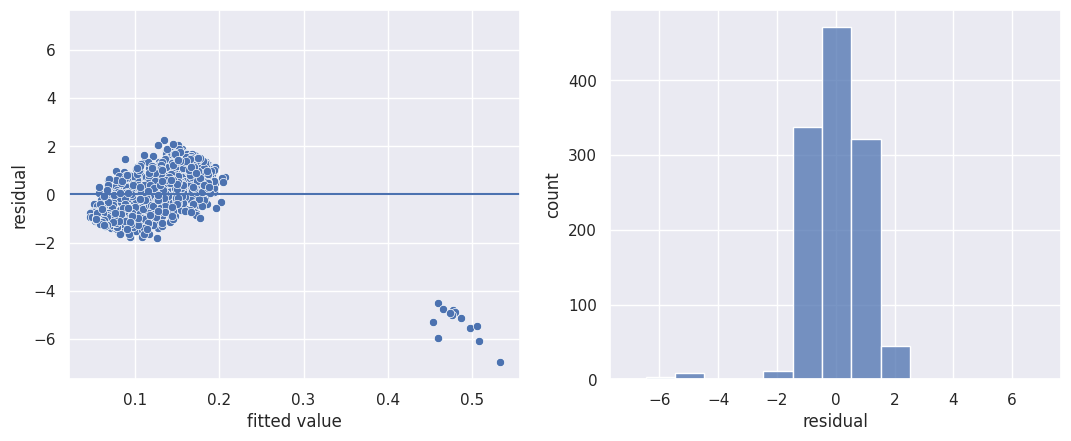

variable,coefficient,std error,p-value
c_quest_restrict,0.535571,0.013905,0.000000
TP_SEXO_M,0.007845,0.002938,0.007676
TP_FAIXA_ETARIA2,-0.000328,0.005050,0.948262
TP_FAIXA_ETARIA3,-0.004142,0.004067,0.308711
TP_FAIXA_ETARIA4,0.004527,0.004960,0.361640
TP_FAIXA_ETARIA5,-0.005232,0.006446,0.417119
TP_FAIXA_ETARIA6,0.010087,0.008394,0.229714
TP_FAIXA_ETARIA7,-0.001786,0.011191,0.873244
TP_FAIXA_ETARIA8,-0.013025,0.013300,0.327613
TP_FAIXA_ETARIA9,0.004578,0.016200,0.777519


In [45]:
linear_results(perif_prova_restrict)

### Refazendo regressões discretizando centro e periferia

In [46]:
df['CENTRO_QUEST'] = df.apply(lambda row: 1 if row['c_quest_restrict'] > 0.5 else 0, axis = 1)
df['CENTRO_PROVA'] = df.apply(lambda row: 1 if row['c_prova_restrict'] > 0.5 else 0, axis = 1)

In [52]:
df_centro_prova = df.loc[df['CENTRO_PROVA'] == 1]
df_periferia_prova = df.loc[df['CENTRO_PROVA'] == 0]

In [53]:
def linear_results_discrete(dataframe):
    result = reg.linear(data = dataframe, formula = 'CENTRO_PROVA ~ CENTRO_QUEST + TP_SEXO_M + TP_FAIXA_ETARIA2 + TP_FAIXA_ETARIA3 + TP_FAIXA_ETARIA4 + TP_FAIXA_ETARIA5 + TP_FAIXA_ETARIA6 + TP_FAIXA_ETARIA7 + TP_FAIXA_ETARIA8 + TP_FAIXA_ETARIA9 + TP_FAIXA_ETARIA10 + TP_FAIXA_ETARIA11 + TP_FAIXA_ETARIA12 + TP_FAIXA_ETARIA13 + TP_FAIXA_ETARIA14 + TP_FAIXA_ETARIA15 + TP_FAIXA_ETARIA16 + TP_FAIXA_ETARIA17')
    result.plot_residuals()
    plt.show()
    return result.micro_summary()

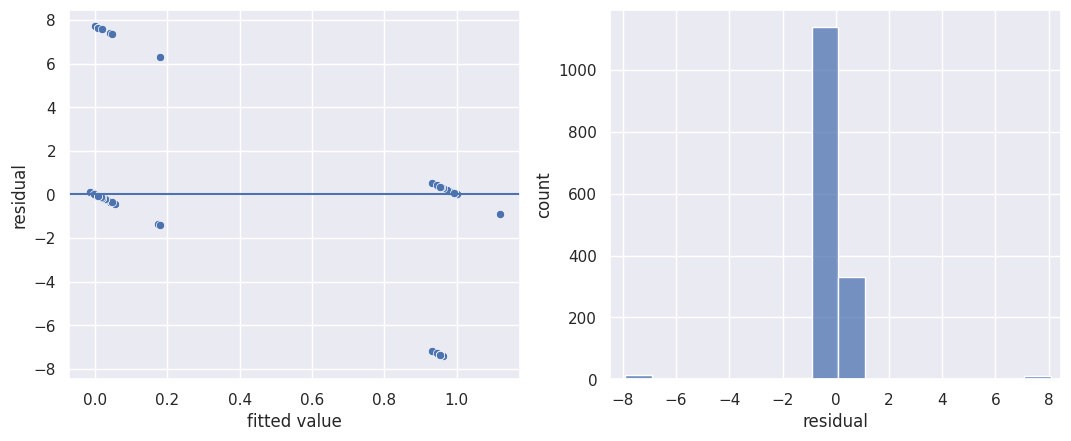

variable,coefficient,std error,p-value
CENTRO_QUEST,0.945152,0.008428,0.000000
TP_SEXO_M,0.007953,0.007024,0.257726
TP_FAIXA_ETARIA2,-0.009863,0.012347,0.424531
TP_FAIXA_ETARIA3,-0.000464,0.009748,0.962021
TP_FAIXA_ETARIA4,-0.007742,0.012111,0.522748
TP_FAIXA_ETARIA5,-0.014881,0.016102,0.355532
TP_FAIXA_ETARIA6,0.010720,0.020298,0.597494
TP_FAIXA_ETARIA7,0.010255,0.026782,0.701830
TP_FAIXA_ETARIA8,0.005378,0.031297,0.863588
TP_FAIXA_ETARIA9,0.004263,0.035732,0.905045


In [54]:
linear_results_discrete(df)

# 3) Fazendo Recortes

## 3.1) Recuperando dados da planilha original

Para os recortes vamos utilizar alguns dados que não baixamos da planilha original. Vamos fazer isso agora

In [56]:
DATA_DIR = pathlib.Path.cwd().parent / 'projeto' / 'data'
print(DATA_DIR)
RAW_DATA_DIR = DATA_DIR / 'raw'
RAW_DATA_DIR.mkdir(parents=True, exist_ok=True)
print(RAW_DATA_DIR)
RAW_DATA_FILE_PATH = DATA_DIR / 'raw' / 'MICRODADOS_ENEM_2021.csv'
print(RAW_DATA_FILE_PATH)

/home/jupyter/notebooks/projeto/data
/home/jupyter/notebooks/projeto/data/raw
/home/jupyter/notebooks/projeto/data/raw/MICRODADOS_ENEM_2021.csv


In [57]:
variaveis_de_interesse = ['NU_INSCRICAO', 'SG_UF_PROVA', 'Q025', 'TP_LOCALIZACAO_ESC', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC']

In [58]:
# Carregando arquivo inteiro
raw_data = pd.read_csv(RAW_DATA_FILE_PATH, 
           usecols = variaveis_de_interesse,
           encoding='latin-1', 
           sep=';')

In [59]:
merged_df = pd.merge(df, raw_data, on='NU_INSCRICAO')

In [60]:
merged_df.head()

,index,NU_INSCRICAO,TP_FAIXA_ETARIA,Q001,Q002,Q005,Q006,Q007,Q008,Q009,...,TP_FAIXA_ETARIA17,TP_SEXO_F,TP_SEXO_M,CENTRO_QUEST,CENTRO_PROVA,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,SG_UF_PROVA,Q025
0,2146868,210054238796,11,E,C,2.0,C,A,B,C,...,0,0,1,1,1,0,NaN,NaN,MG,B
1,2822966,210052121926,3,B,B,8.0,D,A,D,E,...,0,1,0,0,1,0,2.0,1.0,SP,B
2,2965833,210054081240,6,G,F,4.0,H,A,C,D,...,0,1,0,1,1,0,NaN,NaN,PB,B
3,2322664,210051351311,10,D,F,5.0,G,A,B,D,...,0,0,1,0,0,0,NaN,NaN,MT,B
4,2660396,210054361898,17,A,B,2.0,B,A,B,C,...,1,1,0,0,0,0,NaN,NaN,PE,B


Duas das colunas que gostaríamos de investigar são a Dependência Administrativa da Escola (`TP_DEPENDENCIA_ADM_ESC`se ela é Federal, Estadual, Municipal ou Privada) e a Localização da Escola (`TP_LOCALIZACAO_ESC`, se ela é Rural ou Urbana), mas parece que ela não estão completas:

In [61]:
merged_df['TP_LOCALIZACAO_ESC'].isna().sum()

1087

In [62]:
merged_df['TP_DEPENDENCIA_ADM_ESC'].isna().sum()

1087

Vamos dropar essas colunas

In [63]:
merged_df = merged_df.drop(columns=['TP_LOCALIZACAO_ESC', 'TP_DEPENDENCIA_ADM_ESC'])

## 3.2) Recorte com Treineiro

### Regressões

Vamos ver quantos treineiros estão nesse recorte

In [64]:
merged_df.loc[merged_df['IN_TREINEIRO'] == 1].shape[0]

242

Parece ser um número significativo. Vamos ver os resultados das regressões

In [70]:
df_treineiros = merged_df.loc[merged_df['IN_TREINEIRO'] == 1]
df_nao_treineiros = merged_df.loc[merged_df['IN_TREINEIRO'] == 0]

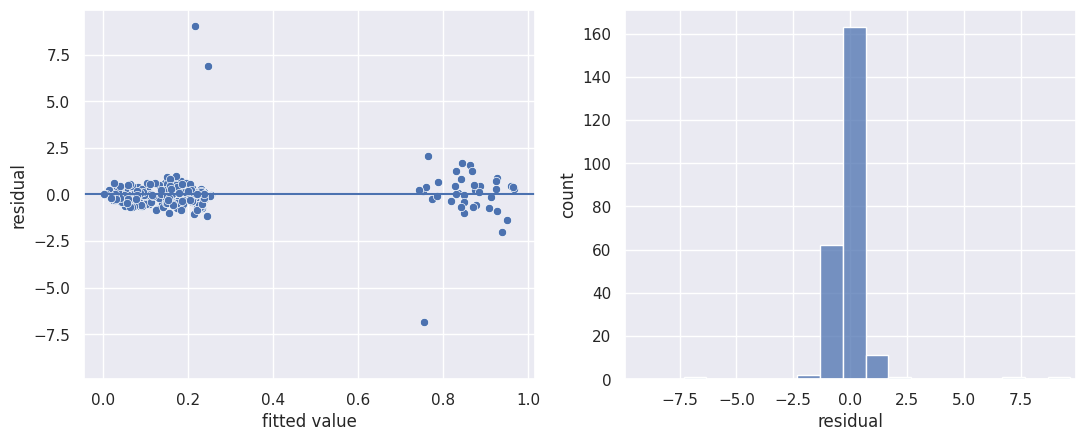

variable,coefficient,std error,p-value
c_quest_restrict,0.959628,0.016921,0.000000
TP_SEXO_M,-0.003260,0.010525,0.757040
TP_FAIXA_ETARIA2,-0.018260,0.010380,0.079827
TP_FAIXA_ETARIA3,0.016304,0.026529,0.539417
TP_FAIXA_ETARIA4,-0.013001,0.050599,0.797442
TP_FAIXA_ETARIA5,0.000000,0.000000,nan
TP_FAIXA_ETARIA6,0.000000,0.000000,nan
TP_FAIXA_ETARIA7,0.000000,0.000000,nan
TP_FAIXA_ETARIA8,0.000000,0.000000,nan
TP_FAIXA_ETARIA9,0.000000,0.000000,nan


In [71]:
linear_results(df_treineiros)

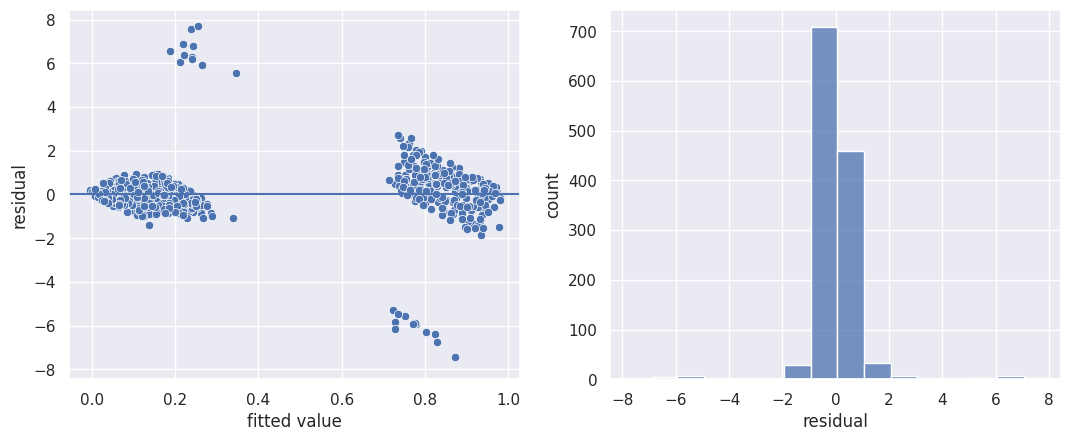

variable,coefficient,std error,p-value
c_quest_restrict,0.956845,0.008250,0.000000
TP_SEXO_M,0.009430,0.005336,0.077422
TP_FAIXA_ETARIA2,0.009928,0.027875,0.721767
TP_FAIXA_ETARIA3,-0.006697,0.007306,0.359487
TP_FAIXA_ETARIA4,-0.004567,0.008552,0.593394
TP_FAIXA_ETARIA5,-0.008824,0.011291,0.434630
TP_FAIXA_ETARIA6,0.009338,0.014191,0.510672
TP_FAIXA_ETARIA7,0.009214,0.018723,0.622723
TP_FAIXA_ETARIA8,-0.008026,0.021874,0.713751
TP_FAIXA_ETARIA9,-0.000938,0.024978,0.970054


In [72]:
linear_results(df_nao_treineiros)

Vamos ver as respostas para eles

### Verificando Perfil

Perfil geral dos candidatos treineiros

In [84]:
colunas_de_interesse = ['TP_FAIXA_ETARIA','TP_SEXO_M', 'ACERTOS_GERAIS', 'ACERTOS_ESPECIFICAS', 
                        'ACERTOS_TOTAIS', 'c_quest', 'c_prova', 'c_quest_restrict', 'c_prova_restrict']

In [86]:
treineiros_summary = df_treineiros[colunas_de_interesse].describe()
treineiros_summary

,TP_FAIXA_ETARIA,TP_SEXO_M,ACERTOS_GERAIS,ACERTOS_ESPECIFICAS,ACERTOS_TOTAIS,c_quest,c_prova,c_quest_restrict,c_prova_restrict
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,1.462810,0.318182,28.016529,30.673554,58.690083,0.264817,0.270188,0.248051,0.248968
std,0.631685,0.466736,9.813602,10.657865,19.159275,0.303127,0.310087,0.289637,0.287343
min,1.000000,0.000000,11.000000,14.000000,28.000000,0.000833,0.000208,0.000626,0.000626
25%,1.000000,0.000000,20.250000,23.000000,44.000000,0.080208,0.069271,0.067296,0.072456
50%,1.000000,0.000000,27.500000,28.000000,55.000000,0.144896,0.153958,0.154921,0.150855
75%,2.000000,1.000000,35.000000,37.000000,71.000000,0.234740,0.230625,0.224719,0.226804
max,4.000000,1.000000,59.000000,78.000000,137.000000,0.999167,0.998333,0.989167,0.995000


In [87]:
nao_treineiros = df_nao_treineiros[colunas_de_interesse].describe()
nao_treineiros

,TP_FAIXA_ETARIA,TP_SEXO_M,ACERTOS_GERAIS,ACERTOS_ESPECIFICAS,ACERTOS_TOTAIS,c_quest,c_prova,c_quest_restrict,c_prova_restrict
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1257.000000,1257.000000
mean,4.971383,0.370429,28.461844,31.204293,59.666137,0.276363,0.275330,0.279711,0.279534
std,3.539410,0.483112,10.709391,12.639689,22.352242,0.309365,0.308067,0.311697,0.312121
min,1.000000,0.000000,7.000000,5.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,20.000000,23.000000,44.000000,0.077344,0.079010,0.079858,0.079858
50%,3.000000,0.000000,26.000000,28.000000,54.000000,0.158229,0.156354,0.156589,0.157214
75%,6.000000,1.000000,35.000000,36.000000,70.000000,0.233854,0.235313,0.236239,0.234987
max,17.000000,1.000000,63.000000,87.000000,146.000000,0.998333,0.999167,0.999167,0.999167


## 3.3) Recorte com Q025 (Internet na Casa)

In [88]:
df_sem_internet = merged_df.loc[merged_df['Q025'] == 'A']
df_com_internet = merged_df.loc[merged_df['Q025'] == 'B']

In [91]:
df_sem_internet.shape

(129, 57)

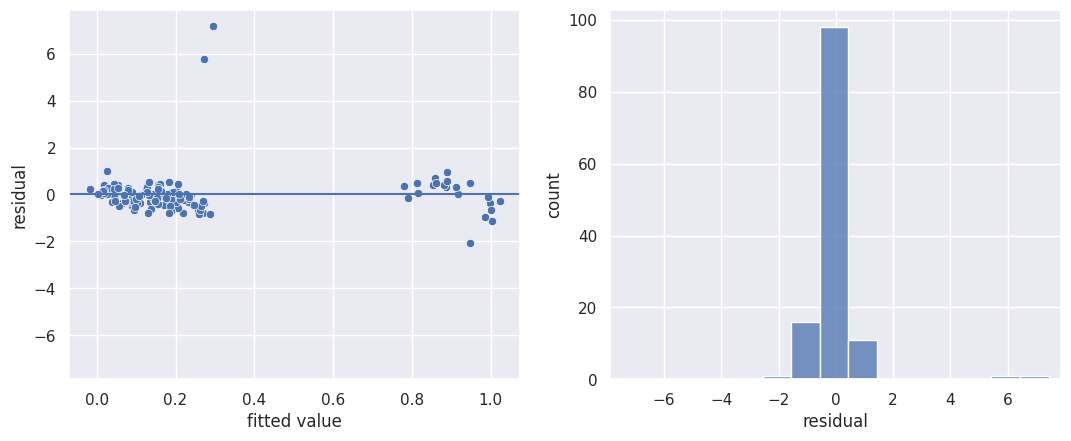

variable,coefficient,std error,p-value
c_quest_restrict,1.029098,0.030922,0.000000
TP_SEXO_M,0.029596,0.018757,0.117458
TP_FAIXA_ETARIA2,0.020187,0.040452,0.618751
TP_FAIXA_ETARIA3,-0.013915,0.025762,0.590205
TP_FAIXA_ETARIA4,-0.015413,0.029828,0.606389
TP_FAIXA_ETARIA5,-0.007493,0.035477,0.833112
TP_FAIXA_ETARIA6,0.039101,0.059239,0.510596
TP_FAIXA_ETARIA7,-0.032288,0.066256,0.627005
TP_FAIXA_ETARIA8,0.003140,0.076200,0.967200
TP_FAIXA_ETARIA9,0.013929,0.078219,0.858988


In [92]:
linear_results(df_sem_internet)

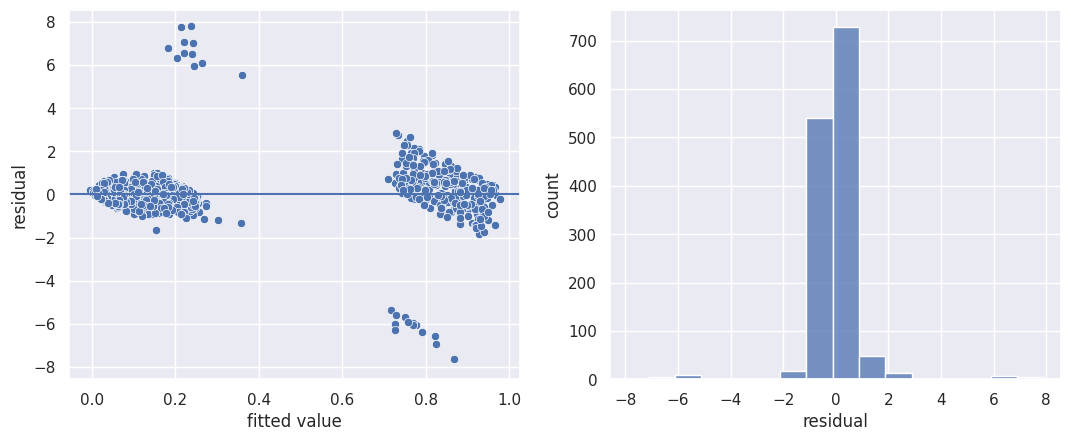

variable,coefficient,std error,p-value
c_quest_restrict,0.951958,0.007712,0.000000
TP_SEXO_M,0.005949,0.004977,0.232208
TP_FAIXA_ETARIA2,-0.006346,0.008601,0.460785
TP_FAIXA_ETARIA3,-0.002733,0.006890,0.691668
TP_FAIXA_ETARIA4,-0.003291,0.008592,0.701803
TP_FAIXA_ETARIA5,-0.010206,0.011592,0.378793
TP_FAIXA_ETARIA6,0.010122,0.014366,0.481194
TP_FAIXA_ETARIA7,0.008072,0.019473,0.678559
TP_FAIXA_ETARIA8,-0.005028,0.022585,0.823869
TP_FAIXA_ETARIA9,-0.014590,0.026610,0.583592


In [93]:
linear_results(df_com_internet)

In [94]:
treineiros_summary = df_com_internet[colunas_de_interesse].describe()
treineiros_summary

,TP_FAIXA_ETARIA,TP_SEXO_M,ACERTOS_GERAIS,ACERTOS_ESPECIFICAS,ACERTOS_TOTAIS,c_quest,c_prova,c_quest_restrict,c_prova_restrict
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,4.305616,0.367615,28.951131,31.636032,60.587163,0.274348,0.271006,0.276669,0.275423
std,3.436063,0.482332,10.637138,12.625527,22.214356,0.308432,0.305810,0.310336,0.308528
min,1.000000,0.000000,7.000000,5.000000,18.000000,0.000000,0.000208,0.000000,0.000000
25%,2.000000,0.000000,21.000000,23.000000,44.000000,0.078229,0.076146,0.078086,0.078503
50%,3.000000,0.000000,27.000000,28.000000,55.000000,0.155208,0.154792,0.156172,0.155963
75%,5.000000,1.000000,36.000000,38.000000,72.000000,0.234063,0.233854,0.235300,0.235509
max,17.000000,1.000000,63.000000,87.000000,146.000000,0.999167,0.999167,0.999167,0.999167


In [95]:
treineiros_summary = df_sem_internet[colunas_de_interesse].describe()
treineiros_summary

,TP_FAIXA_ETARIA,TP_SEXO_M,ACERTOS_GERAIS,ACERTOS_ESPECIFICAS,ACERTOS_TOTAIS,c_quest,c_prova,c_quest_restrict,c_prova_restrict
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,128.000000,128.000000
mean,5.465116,0.302326,22.426357,25.620155,48.046512,0.276116,0.311634,0.252437,0.265783
std,3.960837,0.461056,7.594998,6.615788,13.133248,0.308044,0.332575,0.286651,0.307730
min,1.000000,0.000000,10.000000,12.000000,26.000000,0.000208,0.000000,0.000209,0.003128
25%,3.000000,0.000000,17.000000,21.000000,39.000000,0.076875,0.089792,0.078764,0.075532
50%,4.000000,0.000000,21.000000,24.000000,45.000000,0.167708,0.166042,0.155234,0.159716
75%,8.000000,1.000000,26.000000,28.000000,55.000000,0.234583,0.245208,0.223676,0.218098
max,16.000000,1.000000,51.000000,52.000000,103.000000,0.985833,0.982500,0.993333,0.996667
